In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets  
import numpy as np
from sklearn.model_selection import train_test_split


In [2]:
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn import preprocessing
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("Fraud_check.csv")


In [4]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [10]:
label_encoder = preprocessing.LabelEncoder()
df['Urban']= label_encoder.fit_transform(df['Urban'])
df['Undergrad']= label_encoder.fit_transform(df['Undergrad'])
df['Marital.Status']= label_encoder.fit_transform(df['Marital.Status'])


In [11]:
df1=df.values



In [12]:
X=df1[:,0:5]
Y=df1[:,5:]


In [13]:
from sklearn.preprocessing import scale
X1 = scale(X)
Y1=scale(Y)


In [14]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.33,random_state=1)
model_f = DecisionTreeClassifier(criterion = 'gini',max_depth=3)
model_f.fit(X_train, Y_train)


DecisionTreeClassifier(max_depth=3)

In [16]:
colname=list(df.columns)


In [17]:
colname


['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']

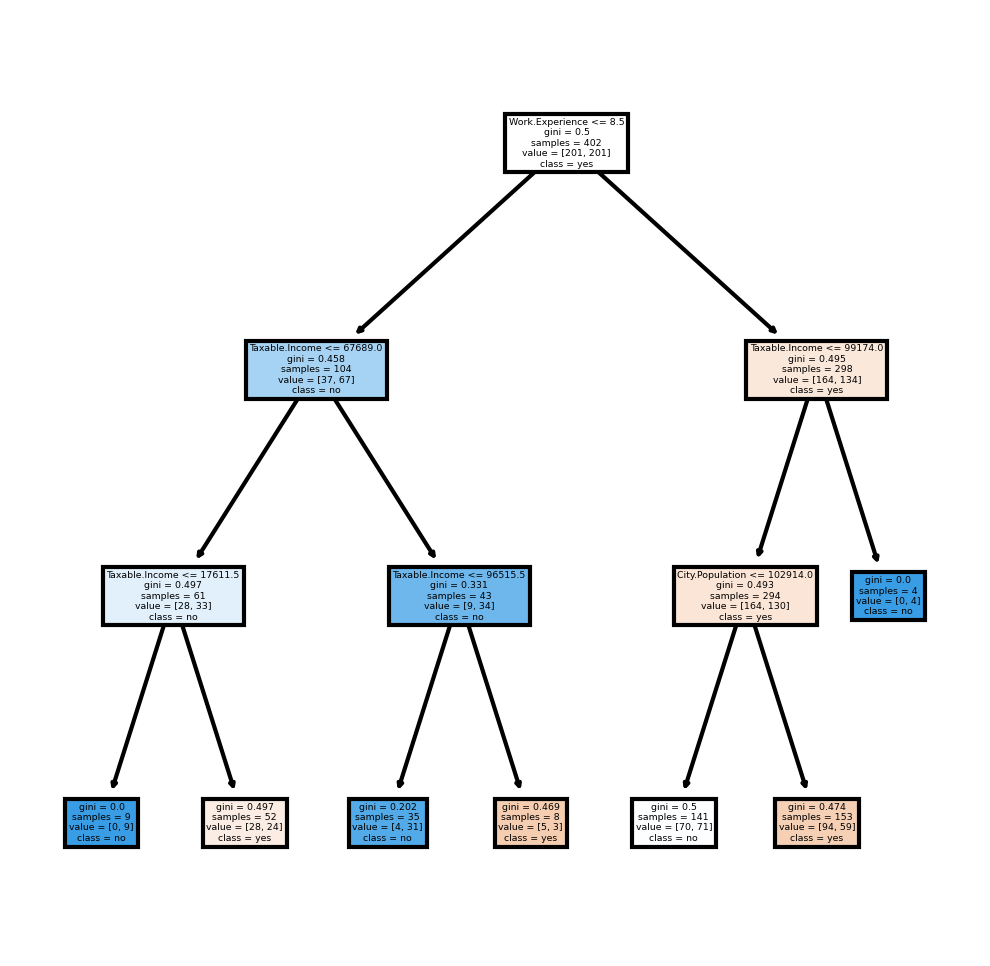

In [20]:
fn=['Undergrad',
 'Marital.Status',
 'Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Urban']
cn=['yes','no']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(model_f,
               feature_names = fn, 
               class_names=cn,
               filled = True);


In [21]:
model_f.score(X_test,Y_test)


0.5404040404040404

# Pruning Of the Tree


In [23]:
model_f1= DecisionTreeClassifier(criterion = 'gini' ,splitter = 'random',max_depth=2,max_leaf_nodes = 10,min_samples_leaf = 5)

model_f1.fit(X_train,Y_train)
model_f1.score(X_test,Y_test)


0.5151515151515151

In [26]:
model_f2=DecisionTreeClassifier(criterion='gini',splitter='random',max_depth=4,max_leaf_nodes=5,min_samples_leaf=4)
model_f2.fit(X_train,Y_train)
model_f2.score(X_test,Y_test)


0.5808080808080808

In [29]:
model_f3=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
            max_features=None, max_leaf_nodes=3, min_samples_leaf=2,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='random')
model_f3.fit(X_train,Y_train)
model_f3.score(X_test,Y_test)


0.5303030303030303